### This Case study contains imformation of the users of a social network and its clients can put their ads on this social network and one of the client is a car companywho has just launched its brand new luxury SUV for a rediculuous price and we are gonna a see which of these users of the social network are going to buy a this brand SUV

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
X=data.iloc[:,[2,3]].values
Y=data.iloc[:,4].values
from sklearn.model_selection import train_test_split as tt
X_train, X_test ,Y_train ,Y_test=tt(X,Y,train_size=0.7,test_size=0.3,random_state=100)


#### Plotting the respective choice on the basis of age and salary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


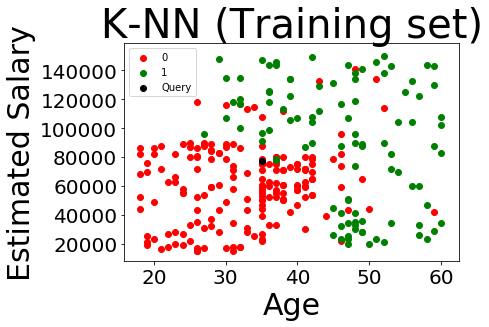

In [4]:
from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, Y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
query=X_test[60,[0,1]]
plt.scatter(query[0],query[1],c='black',label='Query')
plt.title('K-NN (Training set)',fontsize=40)
plt.xlabel('Age',fontsize=30)
plt.ylabel('Estimated Salary',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

#### Rescaling the data

In [19]:
X=(X-X.mean())/X.std()

#### Splitting into training and testing Data

In [ ]:
from sklearn.model_selection import train_test_split as tt
X_train_cv, X_test ,Y_train_cv ,Y_test=tt(X,Y,train_size=0.8,test_size=0.2,random_state=100)

#### Finding The value of 'k nearest neighbor to choose' by splitting the training data into furthur training and cross validation data ....

In [37]:
from sklearn.model_selection import train_test_split as tt
X_train , X_cv , Y_train ,Y_cv = tt(X_train_cv,Y_train_cv,train_size=0.8,test_size=0.2,random_state=100)
for i in range(1,11):
    from sklearn.neighbors import KNeighborsClassifier
    classifier1=KNeighborsClassifier(n_neighbors=i,p=2)
    classifier1.fit(X_train,Y_train)
    y_pred_cv=classifier1.predict(X_cv)
    accuracies=[]
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_cv,y_pred_cv)
    acc=(cm[0][0]+cm[1][1])/cm.sum()*100
    accuracies.append(acc)
    print(accuracies)

[81.25]
[84.375]
[84.375]
[81.25]
[79.6875]
[81.25]
[79.6875]
[82.8125]
[82.8125]
[84.375]


## Maximum accuracy is for k=3

### KNN model with K nearest neighbours = 3

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3,p=2)
classifier.fit(X_train_cv,Y_train_cv)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
# print(cm)
accuracy_final=(cm[0][0]+cm[1][1])/cm.sum()*100
print(accuracy_final)

80.0


#### Checking the model on a random data(age and salary) to predict whether the client will purchse the SUV or not

In [44]:
query=np.array([50,50000])
query=(query-query.mean())/query.std()
query=query.reshape(1,-1)
y_query=classifier.predict(query)
if y_query==1:
    print('Will Purchase the SUV ')
else:
    print('Will Not Purchase the SUV')

Will Not Purchase the SUV
